In [1]:
import pandas as pd
import sys,os,copy,pdb,importlib
sys.path.append('../classes')
sys.path.append('../analysis')
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tournament_new as tn
import create_database as cd
importlib.reload(tn)

from beck.beck_game import BeckGame as Game
from arena import Arena
importlib.reload(tn)
game = Game(4,9,4)
all_p = pd.read_pickle(cd.DATABASE_LOC)

# res = tn.merge_res_to_base()
tournament_res = pd.read_pickle('/scratch/zz737/fiar/tournaments/ai_all_player_round_robin_base.pkl')

In [3]:
tournament_res = tournament_res.dropna(axis=0,how='all').dropna(axis=1,how='all')

In [4]:
mask=(all_p['n_mcts']==100)&(all_p['cpuct']==1)
oppos = all_p.loc[mask]['id']

In [5]:
oppos

129       tournament_1;mcts100;cpuct1;1
130       tournament_1;mcts100;cpuct1;2
131       tournament_1;mcts100;cpuct1;3
132       tournament_1;mcts100;cpuct1;4
133       tournament_1;mcts100;cpuct1;6
134       tournament_1;mcts100;cpuct1;7
135       tournament_1;mcts100;cpuct1;9
136      tournament_1;mcts100;cpuct1;11
137      tournament_1;mcts100;cpuct1;12
138      tournament_1;mcts100;cpuct1;16
139      tournament_1;mcts100;cpuct1;18
140      tournament_1;mcts100;cpuct1;21
141      tournament_1;mcts100;cpuct1;25
142      tournament_1;mcts100;cpuct1;28
143      tournament_1;mcts100;cpuct1;29
144      tournament_1;mcts100;cpuct1;30
145      tournament_1;mcts100;cpuct1;37
146      tournament_1;mcts100;cpuct1;38
147      tournament_1;mcts100;cpuct1;39
148      tournament_1;mcts100;cpuct1;45
149      tournament_1;mcts100;cpuct1;47
150    tournament_1;mcts100;cpuct1;best
Name: id, dtype: object

In [6]:
tournament_res.loc['tournament_1;mcts100;cpuct1;39',oppos].dropna().iloc[-100:]

tournament_1;mcts100;cpuct1;1     1.0000
tournament_1;mcts100;cpuct1;2     1.0000
tournament_1;mcts100;cpuct1;3     1.0000
tournament_1;mcts100;cpuct1;4    -1.0000
tournament_1;mcts100;cpuct1;6     1.0000
tournament_1;mcts100;cpuct1;7     1.0000
tournament_1;mcts100;cpuct1;9     1.0000
tournament_1;mcts100;cpuct1;11   -1.0000
tournament_1;mcts100;cpuct1;12    1.0000
tournament_1;mcts100;cpuct1;16    1.0000
tournament_1;mcts100;cpuct1;18    0.0001
tournament_1;mcts100;cpuct1;21    1.0000
tournament_1;mcts100;cpuct1;25    0.0001
tournament_1;mcts100;cpuct1;28    0.0001
tournament_1;mcts100;cpuct1;29    0.0001
tournament_1;mcts100;cpuct1;30    1.0000
tournament_1;mcts100;cpuct1;37    0.0001
tournament_1;mcts100;cpuct1;38    0.0001
tournament_1;mcts100;cpuct1;45    0.0001
tournament_1;mcts100;cpuct1;47    0.0001
Name: tournament_1;mcts100;cpuct1;39, dtype: object

In [ ]:
tournament_res.loc['tournament_1;mcts100;cpuct1;39']

In [5]:
all_p

,tree_type,value_func_type,other_type,n_mcts,cpuct,value_func_iter,mcts_iter,n_bfts,pruning_thresh,center,2_con,2_uncon,3,4,oppo_scale,id,tournament,mcts_location,value_func_location,better_than_last
0,mcts,nn,NaN,25,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tournament_1;mcts25;cpuct1;1,1,/scratch/zz737/fiar/tournaments/tournament_1/c...,/scratch/zz737/fiar/tournaments/tournament_1/c...,True
1,mcts,nn,NaN,25,1,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tournament_1;mcts25;cpuct1;2,1,/scratch/zz737/fiar/tournaments/tournament_1/c...,/scratch/zz737/fiar/tournaments/tournament_1/c...,True
2,mcts,nn,NaN,25,1,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tournament_1;mcts25;cpuct1;3,1,/scratch/zz737/fiar/tournaments/tournament_1/c...,/scratch/zz737/fiar/tournaments/tournament_1/c...,True
3,mcts,nn,NaN,25,1,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tournament_1;mcts25;cpuct1;4,1,/scratch/zz737/fiar/tournaments/tournament_1/c...,/scratch/zz737/fiar/tournaments/tournament_1/c...,True
4,mcts,nn,NaN,25,1,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tournament_1;mcts25;cpuct1;9,1,/scratch/zz737/fiar/tournaments/tournament_1/c...,/scratch/zz737/fiar/tournaments/tournament_1/c...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,mcts,nn,NaN,100,2,48,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tournament_5;mcts100;cpuct2;id-1;48,5,/scratch/zz737/fiar/tournaments/tournament_5/c...,/scratch/zz737/fiar/tournaments/tournament_5/c...,True
1021,mcts,nn,NaN,100,2,49,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tournament_5;mcts100;cpuct2;id-1;49,5,/scratch/zz737/fiar/tournaments/tournament_5/c...,/scratch/zz737/fiar/tournaments/tournament_5/c...,True
1022,mcts,nn,NaN,100,2,51,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tournament_5;mcts100;cpuct2;id-1;51,5,/scratch/zz737/fiar/tournaments/tournament_5/c...,/scratch/zz737/fiar/tournaments/tournament_5/c...,True
1023,mcts,nn,NaN,100,2,best,best,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tournament_5;mcts100;cpuct2;id-1;best,5,/scratch/zz737/fiar/tournaments/tournament_5/c...,/scratch/zz737/fiar/tournaments/tournament_5/c...,True


In [4]:
import arena
importlib.reload(arena)
from arena import Arena

In [84]:
res

(10, 8, 2)

In [13]:
p2_row

tree_type                                                           mcts
value_func_type                                                       nn
other_type                                                           NaN
n_mcts                                                               100
cpuct                                                                  1
value_func_iter                                                        6
mcts_iter                                                              6
n_bfts                                                               NaN
pruning_thresh                                                       NaN
center                                                               NaN
2_con                                                                NaN
2_uncon                                                              NaN
3                                                                    NaN
4                                                  

In [11]:
p1_id = 'tournament_1;mcts100;cpuct2;6'#'tournament_5;mcts100;cpuct2;id-1;49'
#'tournament_1;mcts50;cpuct1;best'#'tournament_1;mcts100;cpuct2;best'#'tournament_4;mcts100;cpuct2;id-3754964;best'#'cog_id_1;tournament_4;mcts100;cpuct2;id-3754964;best'#'cog_id_1;tournament_1;mcts100;cpuct2;21'
# p2_id = 'tournament_4;mcts100;cpuct2;id-3754964;best'#'tournament_1;mcts100;cpuct2;21'
# p2_id = 'tournament_1;mcts100;cpuct2;best'
p2_id = p1_id
# p2_id= 'tournament_1;mcts100;cpuct1;6'#'tournament_5;mcts100;cpuct2;id-1;48'
#'tournament_1;mcts50;cpuct1;39'#'tournament_5;mcts100;cpuct2;id-0;best'#'tournament_1;mcts100;cpuct2;best'#'tournament_1;mcts100;cpuct2;21'

game = Game(4,9,4)
select_row_by_id = lambda id,df:df.loc[df['id']==id].iloc[0]
p1_row = select_row_by_id(p1_id,all_p)

p2_row = select_row_by_id(p2_id,all_p)
# p2_row = cd.merge_cog_with_mcts(all_p,'cog_id_1',p1_id)
p2_row.cpuct = 1

p1,_,p1_tree = tn.get_player(game, p1_row, temp=1/10,deterministic=False)
p2,_,p2_tree = tn.get_player(game, p2_row, temp=1/10,deterministic=False)
arena = Arena(p1, p2, game, display=game.display,tree1=p1_tree,tree2=p2_tree)
res=arena.playGames(10,verbose=True)

Arena.playGames (1):   0%|          | 0/5 [00:00<?, ?it/s]

Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - O - - - - - |
-----------------------
Turn  5 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X X - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - O - - - - - |
-----------------------
Turn  6 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X X O - - - |
1 |- - - O

Arena.playGames (1):  20%|██        | 1/5 [00:28<01:54, 28.61s/it]

Turn  16 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- O X X X O X - - |
1 |- - - O X - O - - |
2 |- - - - - X O - - |
3 |- - O O X - O - - |
-----------------------
Game over: Turn  16 Result  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- O X X X O X - - |
1 |- - - O X - O - - |
2 |- - - - X X O - - |
3 |- - O O X - O - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - 

Arena.playGames (1):  40%|████      | 2/5 [00:57<01:25, 28.57s/it]

Turn  16 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- O X X X O X - - |
1 |- - - O X - O - - |
2 |- - - - - X O - - |
3 |- - O O X - O - - |
-----------------------
Game over: Turn  16 Result  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- O X X X O X - - |
1 |- - - O X - O - - |
2 |- - - - X X O - - |
3 |- - O O X - O - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - 

Arena.playGames (1):  60%|██████    | 3/5 [01:25<00:56, 28.50s/it]

Turn  16 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- O X X X O X - - |
1 |- - - O X - O - - |
2 |- - - - - X O - - |
3 |- - O O X - O - - |
-----------------------
Game over: Turn  16 Result  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- O X X X O X - - |
1 |- - - O X - O - - |
2 |- - - - X X O - - |
3 |- - O O X - O - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - 

Arena.playGames (1):  80%|████████  | 4/5 [01:53<00:28, 28.30s/it]

Turn  16 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- O X X X O X - - |
1 |- - - O X - O - - |
2 |- - - - - X O - - |
3 |- - O O X - O - - |
-----------------------
Game over: Turn  16 Result  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- O X X X O X - - |
1 |- - - O X - O - - |
2 |- - - - X X O - - |
3 |- - O O X - O - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - 

Arena.playGames (2):   0%|          | 0/5 [00:00<?, ?it/s]

Turn  16 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- O X X X O X - - |
1 |- - - O X - O - - |
2 |- - - - - X O - - |
3 |- - O O X - O - - |
-----------------------
Game over: Turn  16 Result  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- O X X X O X - - |
1 |- - - O X - O - - |
2 |- - - - X X O - - |
3 |- - O O X - O - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - 

Arena.playGames (2):  20%|██        | 1/5 [00:30<02:02, 30.59s/it]

Turn  13 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - O X X - O - - |
1 |- - - O - - X - - |
2 |- - - X O - - - - |
3 |- - - O X X O - - |
-----------------------
Game over: Turn  13 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - O X X - O - - |
1 |- - - O - O X - - |
2 |- - - X O - - - - |
3 |- - - O X X O - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - 

Arena.playGames (2):  40%|████      | 2/5 [01:01<01:31, 30.64s/it]

Turn  13 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - O X X - O - - |
1 |- - - O - - X - - |
2 |- - - X O - - - - |
3 |- - - O X X O - - |
-----------------------
Game over: Turn  13 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - O X X - O - - |
1 |- - - O - O X - - |
2 |- - - X O - - - - |
3 |- - - O X X O - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - 

Arena.playGames (2):  60%|██████    | 3/5 [01:35<01:03, 31.77s/it]

Turn  15 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - O X X X - - - |
1 |- X O O - - - - - |
2 |- - - X O - - - - |
3 |- - O O X X O - - |
-----------------------
Game over: Turn  15 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - O X X X - - - |
1 |- X O O - - - - - |
2 |- - O X O - - - - |
3 |- - O O X X O - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - 

Arena.playGames (2):  80%|████████  | 4/5 [02:06<00:31, 31.43s/it]

Game over: Turn  13 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - O X X - O - - |
1 |- - - O - O - X - |
2 |- - - X O - - - - |
3 |- - - O X X O - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - O - - - - - |
-----------------------
Turn  5 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X X - - - - |

Arena.playGames (2): 100%|██████████| 5/5 [02:37<00:00, 31.41s/it]

Turn  13 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - O X X - O - - |
1 |- - - O - - X - - |
2 |- - - X O - - - - |
3 |- - - O X X O - - |
-----------------------
Game over: Turn  13 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - O X X - O - - |
1 |- - - O - O X - - |
2 |- - - X O - - - - |
3 |- - - O X X O - - |
-----------------------


In [12]:
res

(0, 10, 0)

In [101]:
p1_id = 'tournament_1;mcts100;cpuct1;39'
#'tournament_1;mcts50;cpuct1;best'#'tournament_1;mcts100;cpuct2;best'#'tournament_4;mcts100;cpuct2;id-3754964;best'#'cog_id_1;tournament_4;mcts100;cpuct2;id-3754964;best'#'cog_id_1;tournament_1;mcts100;cpuct2;21'
# p2_id = 'tournament_4;mcts100;cpuct2;id-3754964;best'#'tournament_1;mcts100;cpuct2;21'
p2_id = 'tournament_1;mcts100;cpuct1;4'
#'tournament_1;mcts50;cpuct1;39'#'tournament_5;mcts100;cpuct2;id-0;best'#'tournament_1;mcts100;cpuct2;best'#'tournament_1;mcts100;cpuct2;21'

game = Game(4,9,4)
select_row_by_id = lambda id,df:df.loc[df['id']==id].iloc[0]
p1_row = select_row_by_id(p1_id,all_p)
# p1_row = cd.merge_cog_with_mcts(all_p,'cog_id_1',p2_id)
p2_row = select_row_by_id(p2_id,all_p)

p1,_,p1_tree = tn.get_player(game, p1_row, temp=1/10,deterministic=False)
p2,_,p2_tree = tn.get_player(game, p2_row, temp=1/10,deterministic=False)
arena = Arena(p1, p2, game, display=game.display,tree1=p1_tree,tree2=p2_tree)
res=arena.playGames(20,verbose=True)

Arena.playGames (1):   0%|          | 0/10 [00:00<?, ?it/s]

Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - O - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - X - - - - - - |
3 |- - - O - - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - X O - - - - - |
3 |- - - O - - - - - |
-----------------------
Turn  5 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - - - - - - - - |
2 |- - X O - - - - - |
3 |- - - O - - - - - |
-----------------------
Turn  6 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - - O

Arena.playGames (1):  10%|█         | 1/10 [00:24<03:42, 24.73s/it]

Turn  11 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X X X - - - - - |
1 |- - X O - - - - - |
2 |- O X O - - - - - |
3 |- - O O - - - - - |
-----------------------
Turn  12 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X X X O - - - - |
1 |- - X O - - - - - |
2 |- O X O - - - - - |
3 |- - O O - - - - - |
-----------------------
Game over: Turn  12 Result  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X X X X O - - - - |
1 |- - X O - - - - - |
2 |- O X O - - - - - |
3 |- - O O - - - - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - 

Arena.playGames (1):  20%|██        | 2/10 [00:47<03:12, 24.09s/it]

Turn  11 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - X O - - - |
1 |- - - - X X X - - |
2 |- - - - - O X - - |
3 |- - - - - O O O - |
-----------------------
Game over: Turn  11 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - X O - - - |
1 |- - - - X X X - - |
2 |- - - - - O X - - |
3 |- - - - O O O O - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - X - - |
3 |- - - - - O - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - 

Arena.playGames (1):  30%|███       | 3/10 [01:13<02:53, 24.73s/it]

Game over: Turn  11 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - O X X - X - |
1 |- - - - O O - - - |
2 |- - - - - O X X - |
3 |- - - - - O O - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - O - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - X - - - - - - |
3 |- - - O - - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - X O - - - - - |
3 |- - - O - - - - - |
-----------------------
Turn  5 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |

Arena.playGames (1):  40%|████      | 4/10 [01:33<02:20, 23.36s/it]

Turn  9 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- O X X - - - - - |
1 |- - X - - - - - - |
2 |- - X O - - - - - |
3 |- - - O O - - - - |
-----------------------
Turn  10 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- O X X - - - - - |
1 |- - X - - - - - - |
2 |- - X O - - - - - |
3 |- - O O O - - - - |
-----------------------
Turn  11 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- O X X - - - - - |
1 |- - X - - - - - - |
2 |- X X O - - - - - |
3 |- - O O O - - - - |
-----------------------
Game over: Turn  11 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- O X X - - - - - |
1 |- - X - - - - - - |
2 |- X X O - - - - - |
3 |- O O O O - - - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - O - - -

Arena.playGames (1):  50%|█████     | 5/10 [02:19<02:30, 30.05s/it]

Game over: Turn  19 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - O O O O X - |
1 |- - - - - O X O - |
2 |X O - - O X X X O |
3 |- - - - O X X X - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - O - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - O - - - |
1 |- - - - - - X - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - O - - - |
1 |- - - - - O X - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  5 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - O - - - |

Arena.playGames (1):  60%|██████    | 6/10 [03:05<02:19, 34.78s/it]

Game over: Turn  19 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - O O O O X - |
1 |- - - - - O X O - |
2 |X O - - O X X X O |
3 |- - - - O X X X - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - X - - |
3 |- - - - - O - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - O X - - |
3 |- - - - - O - - - |
-----------------------
Turn  5 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - X - - - - |

Arena.playGames (1):  70%|███████   | 7/10 [03:31<01:36, 32.25s/it]

Game over: Turn  11 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - O X X - X - |
1 |- - - - O O - - - |
2 |- - - - - O X X - |
3 |- - - - - O O - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - O - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - X - - - - - - |
3 |- - - O - - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - X O - - - - - |
3 |- - - O - - - - - |
-----------------------
Turn  5 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |

Arena.playGames (1):  80%|████████  | 8/10 [03:55<00:59, 29.81s/it]

Turn  11 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X X X - - - - - |
1 |- - X O - - - - - |
2 |- O X O - - - - - |
3 |- - O O - - - - - |
-----------------------
Turn  12 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X X - - - - - |
1 |- - X O - - - - - |
2 |- O X O - - - - - |
3 |- - O O - - - - - |
-----------------------
Game over: Turn  12 Result  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X X X - - - - |
1 |- - X O - - - - - |
2 |- O X O - - - - - |
3 |- - O O - - - - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - O - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - 

Arena.playGames (1):  90%|█████████ | 9/10 [04:21<00:28, 28.56s/it]

Turn  11 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X X X - - - - - |
1 |- - X O - - - - - |
2 |- O X O - - - - - |
3 |- - O O - - - - - |
-----------------------
Turn  12 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X X X O - - - - |
1 |- - X O - - - - - |
2 |- O X O - - - - - |
3 |- - O O - - - - - |
-----------------------
Game over: Turn  12 Result  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X X X X O - - - - |
1 |- - X O - - - - - |
2 |- O X O - - - - - |
3 |- - O O - - - - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - O - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - O - - - X 

Arena.playGames (2):   0%|          | 0/10 [00:00<?, ?it/s]

Turn  11 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - O O O - - X - |
1 |- - - - - - - - - |
2 |- O O X - X - - - |
3 |- - - - X X - - - |
-----------------------
Game over: Turn  11 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- O O O O - - X - |
1 |- - - - - - - - - |
2 |- O O X - X - - - |
3 |- - - - X X - - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - X - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - O - 

Arena.playGames (2):  10%|█         | 1/10 [00:24<03:42, 24.75s/it]

Turn  11 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - O O X O O |
1 |- - - - - - - - - |
2 |- - - - - X X X - |
3 |- - - - - O - X - |
-----------------------
Turn  12 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - O O X O O |
1 |- - - - - - - - - |
2 |- - - - O X X X - |
3 |- - - - - O - X - |
-----------------------
Game over: Turn  12 Result  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - O O X O O |
1 |- - - - - - - - - |
2 |- - - - O X X X X |
3 |- - - - - O - X - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - 

Arena.playGames (2):  20%|██        | 2/10 [00:50<03:21, 25.20s/it]

Turn  13 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - X - O - |
1 |- - X X - O O - - |
2 |- X - - - O - - - |
3 |O - - - - O - X - |
-----------------------
Game over: Turn  13 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - X - O - |
1 |- - X X - O O - - |
2 |- X - - - O - - - |
3 |O - - - O O - X - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - X - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - O - 

Arena.playGames (2):  30%|███       | 3/10 [01:17<02:58, 25.45s/it]

Turn  12 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - O - - O - |
1 |- - - - O X X X - |
2 |- O - - - - X - - |
3 |- - - - O O - X - |
-----------------------
Game over: Turn  12 Result  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - O - - O - |
1 |- - - - O X X X X |
2 |- O - - - - X - - |
3 |- - - - O O - X - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - X - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - O 

Arena.playGames (2):  40%|████      | 4/10 [02:00<03:04, 30.83s/it]

Turn  18 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X - - O X - O X |
1 |- - - - X O O O X |
2 |- - - - - X O - - |
3 |- - - - O O X X - |
-----------------------
Game over: Turn  18 Result  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X - X O X - O X |
1 |- - - - X O O O X |
2 |- - - - - X O - - |
3 |- - - - O O X X - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - X - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - O 

Arena.playGames (2):  50%|█████     | 5/10 [02:27<02:28, 29.60s/it]

Turn  13 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - X - O - |
1 |- - X X - O O - - |
2 |- X - - - O - - - |
3 |O - - - - O - X - |
-----------------------
Game over: Turn  13 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - X - O - |
1 |- - X X - O O - - |
2 |- X - - - O - - - |
3 |O - - - O O - X - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - X - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - O - 

Arena.playGames (2):  60%|██████    | 6/10 [02:53<01:54, 28.64s/it]

Turn  13 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - O - |
1 |- - X X - O O - - |
2 |- X - - - O - - - |
3 |O - - - X O - X - |
-----------------------
Game over: Turn  13 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - O - O - |
1 |- - X X - O O - - |
2 |- X - - - O - - - |
3 |O - - - X O - X - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - X - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - O - 

Arena.playGames (2):  70%|███████   | 7/10 [03:42<01:44, 34.77s/it]

Turn  21 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X - X O X - O X |
1 |- - - - X O O O X |
2 |- - - X - X O - - |
3 |O - O X O O - X - |
-----------------------
Turn  22 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X - X O X - O X |
1 |- - - O X O O O X |
2 |- - - X - X O - - |
3 |O - O X O O - X - |
-----------------------
Game over: Turn  22 Result  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X - X O X - O X |
1 |- - - O X O O O X |
2 |- - - X - X O - - |
3 |O - O X O O X X - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - 

Arena.playGames (2):  80%|████████  | 8/10 [04:04<01:01, 30.90s/it]

Turn  10 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - O - - - O - |
1 |- - - - - - - - - |
2 |- - O - O X X X - |
3 |- - - - - O - X - |
-----------------------
Game over: Turn  10 Result  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - O - - - O - |
1 |- - - - - - - - - |
2 |- - O - O X X X X |
3 |- - - - - O - X - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - X - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - O 

Arena.playGames (2):  90%|█████████ | 9/10 [04:53<00:36, 36.43s/it]

Turn  22 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X - X O X - O X |
1 |- - - O X O O O X |
2 |- - - X - X O O - |
3 |O - O X - O - X - |
-----------------------
Game over: Turn  22 Result  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X - X O X - O X |
1 |- - - O X O O O X |
2 |- - - X - X O O - |
3 |O - O X - O X X - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - O - X - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - O 

Arena.playGames (2): 100%|██████████| 10/10 [05:37<00:00, 33.70s/it]

Turn  18 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X - - O X - O X |
1 |- O - - X O O O X |
2 |- - - - - X O - - |
3 |- - - - O O X X - |
-----------------------
Game over: Turn  18 Result  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X - X O X - O X |
1 |- O - - X O O O X |
2 |- - - - - X O - - |
3 |- - - - O O X X - |
-----------------------


In [9]:
res

(2, 0, 2)

In [30]:
prev_p_id = 'tournament_5;mcts100;cpuct2;id-0;best'
# prev_p_id = 'tournament_1;mcts100;cpuct2;best'
# prev_p_id = 'tournament_5;mcts100;cpuct2;id-1;27'
prev_p_row = cd.select_row_by_id(prev_p_id,all_p)
p1_row = prev_p_row

In [24]:
import copy
p1_row = copy.copy(p1_row)
iter = 44
tournament=6
id=2
p1_row.value_func_iter = iter
p1_row.mcts_iter = iter
p1_row.id = f'tournament_{tournament};mcts100;cpuct2;id-{id};{iter}'
p1_row.tournament=tournament
p1_row.mcts_location = f'/scratch/zz737/fiar/tournaments/tournament_{tournament}/checkpoints_mcts100_cpuct2_id_0/checkpoint_{iter}.pth.tar'
p1_row.value_func_location = f'/scratch/zz737/fiar/tournaments/tournament_{tournament}/checkpoints_mcts100_cpuct2_id_0/checkpoint_{iter}.pth.tar'


In [31]:
p2_row = copy.copy(p1_row)
iter = 52
tournament=7
id=0
p2_row.value_func_iter = iter
p2_row.mcts_iter = iter
p2_row.id = f'tournament_{tournament};mcts100;cpuct2;id-{id};{iter}'
p2_row.tournament=tournament
p2_row.mcts_location = f'/scratch/zz737/fiar/tournaments/tournament_{tournament}/checkpoints_mcts100_cpuct2_id_{id}/checkpoint_{iter}.pth.tar'
p2_row.value_func_location = f'/scratch/zz737/fiar/tournaments/tournament_{tournament}/checkpoints_mcts100_cpuct2_id_{id}/checkpoint_{iter}.pth.tar'


In [34]:


game = Game(4,9,4)

p1,_,p1_tree = tn.get_player(game, p1_row, temp=1/10,deterministic=False)
p2,_,p2_tree = tn.get_player(game, p2_row, temp=1/10,deterministic=False)
arena = Arena(p1, p2, game, display=game.display,tree1=p1_tree,tree2=p2_tree)
res=arena.playGames(10,verbose=True)

Arena.playGames (1):   0%|          | 0/5 [00:00<?, ?it/s]

Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
before action
after action
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
before action
after action
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
before action
after action
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - O O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
before action
after action
Turn  5 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - O O X - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
--------------

Arena.playGames (1):  20%|██        | 1/5 [00:30<02:00, 30.24s/it]

after action
Turn  17 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X - O X X - - - - |
1 |X O O O X - - - - |
2 |- - O - - X - - - |
3 |- - X O X O O - - |
-----------------------
before action
after action
Game over: Turn  17 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X - O X X - - - - |
1 |X O O O X - - - - |
2 |- - O - O X - - - |
3 |- - X O X O O - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
before action
after action
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
before action
after action
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
----------------

Arena.playGames (1):  40%|████      | 2/5 [01:00<01:30, 30.17s/it]

after action
Turn  17 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X - O X X - - - - |
1 |X O O O X - - - - |
2 |- - O - - X - - - |
3 |- - X O X O O - - |
-----------------------
before action
after action
Game over: Turn  17 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X - O X X - - - - |
1 |X O O O X - - - - |
2 |- - O - O X - - - |
3 |- - X O X O O - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
before action
after action
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - O - - - - - |
3 |- - - - - - - - - |
-----------------------
before action
after action
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - O - - - - - |
3 |- - - X - - - - - |
----------------

Arena.playGames (1):  60%|██████    | 3/5 [01:45<01:09, 34.67s/it]

after action
Turn  34 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X X O X X O X X |
1 |- X O O O X X O - |
2 |X O O O X X O X O |
3 |X O O X O O O X O |
-----------------------
before action
after action
Turn  35 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X X O X X O X X |
1 |- X O O O X X O X |
2 |X O O O X X O X O |
3 |X O O X O O O X O |
-----------------------
before action
after action
Turn  36 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X X |
1 |- X O O O X X O X |
2 |X O O O X X O X O |
3 |X O O X O O O X O |
-----------------------
before action
after action
Game over: Turn  36 Result  0.0001
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X X |
1 |X X O O O X X O X |
2 |X O O O X X O X O |
3 |X O O X O O O X O |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
--------

Arena.playGames (1):  80%|████████  | 4/5 [02:15<00:33, 33.33s/it]

after action
Turn  17 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X - O X X - - - - |
1 |X O O O X - - - - |
2 |- - O - - X - - - |
3 |- - X O X O O - - |
-----------------------
before action
after action
Game over: Turn  17 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X - O X X - - - - |
1 |X O O O X - - - - |
2 |- - O - O X - - - |
3 |- - X O X O O - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
before action
after action
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
before action
after action
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
----------------

Arena.playGames (2):   0%|          | 0/5 [00:00<?, ?it/s]

after action
Turn  17 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X - O X X - - - - |
1 |X O O O X - - - - |
2 |- - O - - X - - - |
3 |- - X O X O O - - |
-----------------------
before action
after action
Game over: Turn  17 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X - O X X - - - - |
1 |X O O O X - - - - |
2 |- - O - O X - - - |
3 |- - X O X O O - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
before action
after action
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - O - - - |
3 |- - - - - - - - - |
-----------------------
before action
after action
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - O - - - |
3 |- - - - - - X - - |
----------------

Arena.playGames (2):  20%|██        | 1/5 [00:32<02:11, 32.89s/it]

after action
Turn  19 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X - X X - - - - |
1 |X O O O X - - - - |
2 |- - O O X O - - - |
3 |- O X O O X X - - |
-----------------------
before action
after action
Game over: Turn  19 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X - X X - - - - |
1 |X O O O X - - - - |
2 |- - O O X O - - - |
3 |- O X O O X X - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
before action
after action
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - O - - - - - |
3 |- - - - - - - - - |
-----------------------
before action
after action
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - O - - - - - |
3 |- - X - - - - - - |
----------------

Arena.playGames (2):  40%|████      | 2/5 [01:17<01:48, 36.29s/it]

after action
Turn  32 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X O X X O X X O |
1 |- X O X O X O X O |
2 |- O O O X O O O X |
3 |- - X O O O X X X |
-----------------------
before action
after action
Turn  33 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X O X X O X X O |
1 |- X O X O X O X O |
2 |X O O O X O O O X |
3 |- - X O O O X X X |
-----------------------
before action
after action
Turn  34 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X O X X O X X O |
1 |- X O X O X O X O |
2 |X O O O X O O O X |
3 |O - X O O O X X X |
-----------------------
before action
after action
Turn  35 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X O X X O X X O |
1 |X X O X O X O X O |
2 |X O O O X O O O X |
3 |O - X O O O X X X |
-----------------------
before action
after action
Turn  36 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X O X X O X X O |
1 |X X O X O X O X O |
2 |X O O O X O O O X |
3 |O - X O O O X X

Arena.playGames (2):  60%|██████    | 3/5 [01:49<01:10, 35.24s/it]

after action
Turn  19 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X - X X - - - - |
1 |X O O O X - - - - |
2 |- - O O X O - - - |
3 |- O X O O X X - - |
-----------------------
before action
after action
Game over: Turn  19 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X - X X - - - - |
1 |X O O O X - - - - |
2 |- - O O X O - - - |
3 |- O X O O X X - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
before action
after action
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - O - - - |
3 |- - - - - - - - - |
-----------------------
before action
after action
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - O - - - |
3 |- - - - - - X - - |
----------------

Arena.playGames (2):  80%|████████  | 4/5 [02:22<00:34, 34.55s/it]

after action
Turn  19 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X - X X - - - - |
1 |X O O O X - - - - |
2 |- - O O X O - - - |
3 |- O X O O X X - - |
-----------------------
before action
after action
Game over: Turn  19 Result  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X - X X - - - - |
1 |X O O O X - - - - |
2 |- - O O X O - - - |
3 |- O X O O X X - - |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
before action
after action
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - O - - - - - |
3 |- - - - - - - - - |
-----------------------
before action
after action
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - O - - - - - |
3 |- - X - - - - - - |
----------------

Arena.playGames (2): 100%|██████████| 5/5 [03:14<00:00, 38.88s/it]

after action
Turn  35 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X - O X O O X |
1 |X X O O O X X O X |
2 |O - X O X O O O X |
3 |X O X X O O X X O |
-----------------------
before action
after action
Turn  36 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X - O X O O X |
1 |X X O O O X X O X |
2 |O O X O X O O O X |
3 |X O X X O O X X O |
-----------------------
before action
after action
Game over: Turn  36 Result  0.0001
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X X O X O O X |
1 |X X O O O X X O X |
2 |O O X O X O O O X |
3 |X O X X O O X X O |
-----------------------


In [35]:
res

(4, 3, 3)

In [32]:
p1(b_arr_final)

7

In [15]:
bs=['''0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |''' ,
'''0 |- - - - - - - - - |
1 |- - - X - O - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |''',
'''0 |- - - - - - - - - |
1 |- - - X O O - - - |
2 |- - - - - - X - - |
3 |- - - - - - - - - |''',
    
    '''0 |- - - - - - - - - |
1 |- - - X O O - - - |
2 |- - - - O - X - - |
3 |- - - - X - - - - |''',
    
    '''0 |- - - - - - X - - |
1 |- - - X O O - - - |
2 |- - - - O - X - - |
3 |- - - O X - - - - |''',
    '''0 |- - - - - - X - - |
1 |- - - X O O O X - |
2 |- - - - O - X - - |
3 |- - - O X - - - - |''',
    
    '''0 |- - - - - X X - - |
1 |- - - X O O O X - |
2 |- - - - O O X - - |
3 |- - - O X - - - - |'''
    
    
]

In [18]:
copy.deepcopy

<function copy.deepcopy(x, memo=None, _nil=[])>

In [26]:
p2_tree.refresh()
p2_tree_copy = copy.copy(p2_tree)
b_arr_final = game.get_board_from_xo_str(bs[-1])
tree_copies = [p2_tree_copy]
for bstr in bs:
    b_arr = game.get_board_from_xo_str(bstr)
    p2_tree.getActionProb(b_arr)
    tree_copies.append(copy.copy(p2_tree))


In [27]:
action_p=[]
for tc in tree_copies:
    action_p.append(tc.getActionProb(b_arr_final))

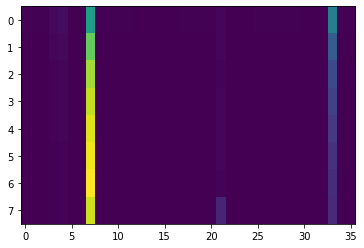

In [28]:
plt.imshow(action_p,aspect='auto')

In [24]:
action_p[-1]

[0.0010559662090813093,
 0.0010559662090813093,
 0.0010559662090813093,
 0.007391763463569166,
 0.007391763463569166,
 0.0,
 0.0,
 0.8109820485744457,
 0.0010559662090813093,
 0.0010559662090813093,
 0.0010559662090813093,
 0.0010559662090813093,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0010559662090813093,
 0.0010559662090813093,
 0.0010559662090813093,
 0.133051742344245,
 0.004223864836325237,
 0.0,
 0.0,
 0.0,
 0.0010559662090813093,
 0.0010559662090813093,
 0.0010559662090813093,
 0.0010559662090813093,
 0.0010559662090813093,
 0.0,
 0.0,
 0.0010559662090813093,
 0.01900739176346357,
 0.0,
 0.0010559662090813093]

In [14]:
p1_id = 'tournament_5;mcts100;cpuct2;id-1;17'
p1_row = cd.select_row_by_id(prev_p_id,all_p)
p2_id = 'tournament_5;mcts100;cpuct2;id-1;16'
p2_row = cd.select_row_by_id(prev_p_id,all_p)



game = Game(4,9,4)

p1,_,p1_tree = tn.get_player(game, p1_row, temp=1/10,deterministic=False)
p2,_,p2_tree = tn.get_player(game, p2_row, temp=1/10,deterministic=False)
arena = Arena(p1, p2, game, display=game.display,tree1=p1_tree,tree2=p2_tree)
res=arena.playGames(30,verbose=True)

Arena.playGames (1):   0%|          | 0/15 [00:00<?, ?it/s]

Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - O O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  5 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - O O X - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  6 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - O O

Arena.playGames (1):   7%|▋         | 1/15 [00:15<03:36, 15.44s/it]

 27 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  32 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O - |
1 |X O O 

Arena.playGames (1):  13%|█▎        | 2/15 [00:30<03:20, 15.40s/it]

 26 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X - O X - |
-----------------------
Turn  27 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X - - |
1 |X O O 

Arena.playGames (1):  20%|██        | 3/15 [00:45<03:04, 15.35s/it]

 25 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |- X X O X - O X - |
-----------------------
Turn  26 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X - O X - |
-----------------------
Turn  27 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O 

Arena.playGames (1):  27%|██▋       | 4/15 [01:00<02:46, 15.15s/it]

Turn  26 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X - O X - |
-----------------------
Turn  27 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X - - |
1 |X

Arena.playGames (1):  33%|███▎      | 5/15 [01:15<02:30, 15.07s/it]

 26 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X - O X - |
-----------------------
Turn  27 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X - - |
1 |X O O 

Arena.playGames (1):  40%|████      | 6/15 [01:30<02:16, 15.14s/it]

Turn  28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |- X O O - X O - - |
2 |X O O O X O O - O |
3 |X O X X O - X - - |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |- X O O - X O - - |
2 |X O O O X O O X O |
3 |X O X X O - X - - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |- X O O - X O O - |
2 |X O O O X O O X O |
3 |X O X X O - X - - |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |- X O O - X O O - |
2 |X O O O X O O X O |
3 |X O X X O X X - - |
-----------------------
Turn  32 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |- X O O - X O O - |
2 |X O O O X O O X O |
3 |X O X X O X X O - |
-----------------------
Turn  33 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |-

Arena.playGames (1):  47%|████▋     | 7/15 [01:45<02:00, 15.12s/it]

Turn  26 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X - O X - |
-----------------------
Turn  27 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X - - |
1 |X

Arena.playGames (1):  53%|█████▎    | 8/15 [02:01<01:46, 15.19s/it]

 29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  32 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  33 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  34 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |X O O 

Arena.playGames (1):  60%|██████    | 9/15 [02:16<01:31, 15.25s/it]

 29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  32 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  33 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  34 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |X O O 

Arena.playGames (1):  67%|██████▋   | 10/15 [02:31<01:16, 15.26s/it]

 31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  32 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  33 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  34 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |X O O O X O O X O |
2 |- X O O - X O O O |
3 |O X X O X X O X - |
-----------------------
Turn  35 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |X O O O X O O X O |
2 |X X O O - X O O O |
3 |O X X O X X O X - |
-----------------------
Turn  36 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |X O O 

Arena.playGames (1):  73%|███████▎  | 11/15 [02:46<01:00, 15.09s/it]

Turn  27 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |- X O O - X O - - |
2 |X O O O X O O - - |
3 |X O X X O - X - - |
-----------------------
Turn  28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |- X O O - X O - - |
2 |X O O O X O O - O |
3 |X O X X O - X - - |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |- X O O - X O - - |
2 |X O O O X O O X O |
3 |X O X X O - X - - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |- X O O - X O O - |
2 |X O O O X O O X O |
3 |X O X X O - X - - |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |- X O O - X O O - |
2 |X O O O X O O X O |
3 |X O X X O X X - - |
-----------------------
Turn  32 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |-

Arena.playGames (1):  80%|████████  | 12/15 [03:01<00:44, 14.99s/it]

 28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  32 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  33 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |X O O 

Arena.playGames (1):  87%|████████▋ | 13/15 [03:16<00:30, 15.10s/it]

Turn  26 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X - O X - |
-----------------------
Turn  27 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X - - |
1 |X

Arena.playGames (1):  93%|█████████▎| 14/15 [03:32<00:15, 15.26s/it]

 28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  32 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  33 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |X O O 

Arena.playGames (2):   0%|          | 0/15 [00:00<?, ?it/s]

 26 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X - O X - |
-----------------------
Turn  27 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X - - |
1 |X O O 

Arena.playGames (2):   7%|▋         | 1/15 [00:15<03:33, 15.26s/it]

 36 Result  0.0001
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |X O O O X O O X O |
2 |X X O O X X O O O |
3 |O X X O X X O X O |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - - O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - O O - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  5 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - X - - - - - |
1 |- - O O

Arena.playGames (2):  13%|█▎        | 2/15 [00:30<03:18, 15.28s/it]

Turn  36 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |X O O O X O O X O |
2 |X X O O - X O O O |
3 |O X X O X X O X O |
-----------------------
Game over: Turn  36 Result  0.0001
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |X O O O X O O X O |
2 |X X O O X X O O O |
3 |O X X O X X O X O |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - O - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - O - - - - - |
3 |- - - X - - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - 

Arena.playGames (2):  20%|██        | 3/15 [00:45<03:01, 15.14s/it]

Turn  28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |- X O O - X O - - |
2 |X O O O X O O - O |
3 |X O X X O - X - - |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |- X O O - X O - - |
2 |X O O O X O O X O |
3 |X O X X O - X - - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |- X O O - X O O - |
2 |X O O O X O O X O |
3 |X O X X O - X - - |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |- X O O - X O O - |
2 |X O O O X O O X O |
3 |X O X X O X X - - |
-----------------------
Turn  32 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |- X O O - X O O - |
2 |X O O O X O O X O |
3 |X O X X O X X O - |
-----------------------
Turn  33 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |-

Arena.playGames (2):  27%|██▋       | 4/15 [01:00<02:45, 15.04s/it]

Turn  26 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X - O X - |
-----------------------
Turn  27 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X - - |
1 |X

Arena.playGames (2):  33%|███▎      | 5/15 [01:15<02:30, 15.04s/it]

Turn  28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - X - O X X O X |
1 |O - O O X O O O X |
2 |- - O X - O O X - |
3 |- X O X X O X X O |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - X - O X X O X |
1 |O X O O X O O O X |
2 |- - O X - O O X - |
3 |- X O X X O X X O |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - X - O X X O X |
1 |O X O O X O O O X |
2 |- O O X - O O X - |
3 |- X O X X O X X O |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - X X O X X O X |
1 |O X O O X O O O X |
2 |- O O X - O O X - |
3 |- X O X X O X X O |
-----------------------
Turn  32 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- O X X O X X O X |
1 |O X O O X O O O X |
2 |- O O X - O O X - |
3 |- X O X X O X X O |
-----------------------
Turn  33 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |O

Arena.playGames (2):  40%|████      | 6/15 [01:30<02:16, 15.16s/it]

 33 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  34 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |X O O O X O O X O |
2 |- X O O - X O O O |
3 |O X X O X X O X - |
-----------------------
Turn  35 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |X O O O X O O X O |
2 |X X O O - X O O O |
3 |O X X O X X O X - |
-----------------------
Turn  36 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |X O O O X O O X O |
2 |X X O O - X O O O |
3 |O X X O X X O X O |
-----------------------
Game over: Turn  36 Result  0.0001
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |X O O O X O O X O |
2 |X X O O X X O O O |
3 |O X X O X X O X O |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - -

Arena.playGames (2):  47%|████▋     | 7/15 [01:45<02:01, 15.18s/it]

 26 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X - O X - |
-----------------------
Turn  27 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X - - |
1 |X O O 

Arena.playGames (2):  53%|█████▎    | 8/15 [02:01<01:46, 15.26s/it]

 27 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  32 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O - |
1 |X O O 

Arena.playGames (2):  60%|██████    | 9/15 [02:16<01:30, 15.14s/it]

Turn  25 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |- X X O X - O X - |
-----------------------
Turn  26 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X - O X - |
-----------------------
Turn  27 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - - |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X

Arena.playGames (2):  67%|██████▋   | 10/15 [02:30<01:14, 14.86s/it]

Turn  28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X O X X O X X O |
1 |- - O X - O O X - |
2 |O - O O X O O O X |
3 |- - X - O X X O X |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X O X X O X X O |
1 |- - O X - O O X - |
2 |O X O O X O O O X |
3 |- - X - O X X O X |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X O X X O X X O |
1 |- O O X - O O X - |
2 |O X O O X O O O X |
3 |- - X - O X X O X |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X O X X O X X O |
1 |- O O X - O O X - |
2 |O X O O X O O O X |
3 |- - X X O X X O X |
-----------------------
Turn  32 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X O X X O X X O |
1 |- O O X - O O X - |
2 |O X O O X O O O X |
3 |- O X X O X X O X |
-----------------------
Turn  33 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- X O X X O X X O |
1 |-

Arena.playGames (2):  73%|███████▎  | 11/15 [02:45<00:59, 14.89s/it]

Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - X - O X X O X |
1 |O X O O X O O O X |
2 |- - O X - O O X - |
3 |- X O X X O X X O |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - X - O X X O X |
1 |O X O O X O O O X |
2 |- O O X - O O X - |
3 |- X O X X O X X O |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - X X O X X O X |
1 |O X O O X O O O X |
2 |- O O X - O O X - |
3 |- X O X X O X X O |
-----------------------
Turn  32 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- O X X O X X O X |
1 |O X O O X O O O X |
2 |- O O X - O O X - |
3 |- X O X X O X X O |
-----------------------
Turn  33 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |O X O O X O O O X |
2 |- O O X - O O X - |
3 |- X O X X O X X O |
-----------------------
Turn  34 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |O

Arena.playGames (2):  80%|████████  | 12/15 [03:00<00:44, 14.93s/it]

Turn  36 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |O X O O X O O O X |
2 |O O O X - O O X X |
3 |O X O X X O X X O |
-----------------------
Game over: Turn  36 Result  0.0001
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |O X O O X O O O X |
2 |O O O X X O O X X |
3 |O X O X X O X X O |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - O - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  3 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - O - - - - - |
3 |- - - X - - - - - |
-----------------------
Turn  4 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - 

Arena.playGames (2):  87%|████████▋ | 13/15 [03:15<00:29, 14.97s/it]

 34 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |- X O O - X O O O |
2 |X O O O X O O X O |
3 |X O X X O X X O X |
-----------------------
Turn  35 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X - |
1 |X X O O - X O O O |
2 |X O O O X O O X O |
3 |X O X X O X X O X |
-----------------------
Turn  36 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X O |
1 |X X O O - X O O O |
2 |X O O O X O O X O |
3 |X O X X O X X O X |
-----------------------
Game over: Turn  36 Result  0.0001
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |O X X O X X O X O |
1 |X X O O X X O O O |
2 |X O O O X O O X O |
3 |X O X X O X X O X |
-----------------------
Turn  1 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - - - |
1 |- - - - - - - - - |
2 |- - - - - - - - - |
3 |- - - - - - - - - |
-----------------------
Turn  2 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - - - - - - -

Arena.playGames (2):  93%|█████████▎| 14/15 [03:30<00:15, 15.09s/it]

Turn  28 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O - O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O - - |
3 |O X X O X X O X - |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O - X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X - - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  32 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O - |
1 |X O O O X O O X O |
2 |- X O O - X O O - |
3 |O X X O X X O X - |
-----------------------
Turn  33 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |X

Arena.playGames (2): 100%|██████████| 15/15 [03:45<00:00, 15.05s/it]

Turn  29 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - X - O X X O X |
1 |O X O O X O O O X |
2 |- - O X - O O X - |
3 |- X O X X O X X O |
-----------------------
Turn  30 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - X - O X X O X |
1 |O X O O X O O O X |
2 |- O O X - O O X - |
3 |- X O X X O X X O |
-----------------------
Turn  31 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- - X X O X X O X |
1 |O X O O X O O O X |
2 |- O O X - O O X - |
3 |- X O X X O X X O |
-----------------------
Turn  32 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |- O X X O X X O X |
1 |O X O O X O O O X |
2 |- O O X - O O X - |
3 |- X O X X O X X O |
-----------------------
Turn  33 Player  1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |O X O O X O O O X |
2 |- O O X - O O X - |
3 |- X O X X O X X O |
-----------------------
Turn  34 Player  -1
   0 1 2 3 4 5 6 7 8 
-----------------------
0 |X O X X O X X O X |
1 |O

In [15]:
res

(0, 0, 30)

In [12]:
b_str='''0 |- - - - - X X - - |
1 |- - - X O O O X - |
2 |- - - - O O X - - |
3 |- - - O X - - - - |'''

b_arr=game.get_board_from_xo_str(b_str)

In [13]:
p1_tree.getActionProb(b_arr)

[0.010101010101010102,
 0.010101010101010102,
 0.010101010101010102,
 0.050505050505050504,
 0.030303030303030304,
 0.0,
 0.0,
 0.5252525252525253,
 0.010101010101010102,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2222222222222222,
 0.010101010101010102,
 0.0,
 0.0,
 0.0,
 0.010101010101010102,
 0.0,
 0.010101010101010102,
 0.0,
 0.010101010101010102,
 0.0,
 0.0,
 0.010101010101010102,
 0.08080808080808081,
 0.0,
 0.0]

In [69]:
p1,p1_val,p1_tree = tn.get_player(game, p1_row, temp=1/10,deterministic=False)

In [70]:
choice_p=p1_tree.getActionProb(b_arr,temp=1/10)
np.argsort(choice_p)

array([ 0, 19, 20, 21, 23, 24, 25, 18, 26, 28, 29, 30, 31, 32, 33, 27, 34,
       17, 15,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16,
       35, 22])

In [72]:
22%9

4

In [55]:
p1_tree.refresh()

In [56]:
p1(b_arr)

10

In [45]:
choice_p

[5.0358014005822646e-05,
 0.0019671099221024472,
 0.0,
 0.00755684947674876,
 0.06526398615154615,
 0.0,
 3.1473758753639154e-06,
 0.0,
 3.1473758753639154e-06,
 3.1473758753639154e-06,
 0.7372916830592493,
 0.00755684947674876,
 0.0,
 3.1473758753639154e-06,
 0.0,
 5.0358014005822646e-05,
 3.1473758753639154e-06,
 5.0358014005822646e-05,
 3.1473758753639154e-06,
 5.0358014005822646e-05,
 0.02064993311826265,
 0.0,
 0.0,
 0.1593359036902982,
 5.0358014005822646e-05,
 0.0,
 3.1473758753639154e-06,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.1473758753639154e-06,
 0.0,
 5.0358014005822646e-05,
 5.0358014005822646e-05]

In [32]:
23%9

5

In [11]:
tournament_res.loc[p1_id,p2_id]

0.0001

In [18]:
all_p.loc[(all_p['tree_type']=='mcts')&(all_p['value_func_type']=='cog')]['id'].iloc[0]

'cog_id_1;tournament_4;mcts100;cpuct2;id-3754964;best'